<a href="https://colab.research.google.com/github/Dev-py-r/Datasciencewith-R/blob/master/Forcasting1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pyramid-arima

     |████████████████████████████████| 604kB 6.3MB/s 


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing # 
import statsmodels.graphics.tsaplots as tsa_plots
import statsmodels.tsa.statespace as tm_models
from datetime import datetime,time

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#from sm.tsa.statespace import sa
Amtrak = pd.read_csv(r"/content/Amtrak.csv")

In [ ]:
Amtrak.rename(columns={"Ridership ":"Ridership"},inplace=True)
# Converting the normal index of Amtrak to time stamp 
Amtrak.index = pd.to_datetime(Amtrak.Month,format="%b-%y")

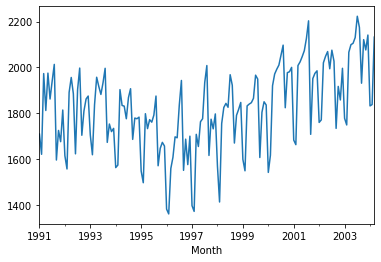

In [ ]:
Amtrak.Ridership.plot() # time series plot 

In [ ]:
# Creating a Date column to store the actual Date format for the given Month column
Amtrak["Date"] = pd.to_datetime(Amtrak.Month,format="%b-%y")

In [ ]:
Amtrak.head()

,Month,Ridership,Date
Month,,,
1991-01-01,Jan-91,1709,1991-01-01
1991-02-01,Feb-91,1621,1991-02-01
1991-03-01,Mar-91,1973,1991-03-01
1991-04-01,Apr-91,1812,1991-04-01
1991-05-01,May-91,1975,1991-05-01


In [ ]:
# Extracting Day, weekday name, month name, year from the Date column using 
# Date functions from pandas 
Amtrak["month"] = Amtrak.Date.dt.strftime("%b") # month extraction
#Amtrak["Day"] = Amtrak.Date.dt.strftime("%d") # Day extraction
#Amtrak["wkday"] = Amtrak.Date.dt.strftime("%A") # weekday extraction
Amtrak["year"] = Amtrak.Date.dt.strftime("%Y") # year extraction

In [ ]:
Amtrak.head()

,Month,Ridership,Date,month,year
Month,,,,,
1991-01-01,Jan-91,1709,1991-01-01,Jan,1991
1991-02-01,Feb-91,1621,1991-02-01,Feb,1991
1991-03-01,Mar-91,1973,1991-03-01,Mar,1991
1991-04-01,Apr-91,1812,1991-04-01,Apr,1991
1991-05-01,May-91,1975,1991-05-01,May,1991


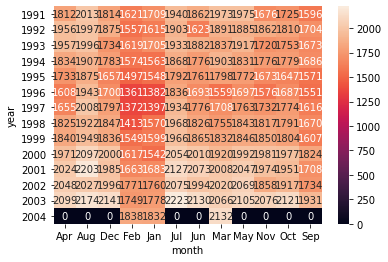

In [ ]:
# Some EDA on Time series data 
# Heat map visualization 
heatmap_y_month = pd.pivot_table(data=Amtrak,values="Ridership",index="year",columns="month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g")

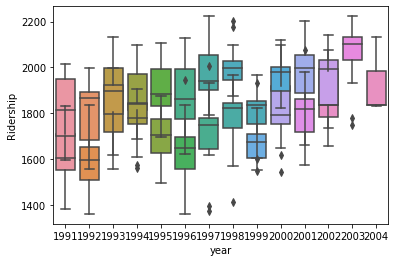

In [ ]:
# Boxplot for ever
sns.boxplot(x="month",y="Ridership",data=Amtrak)
sns.boxplot(x="year",y="Ridership",data=Amtrak)
# sns.factorplot("month","Ridership",data=Amtrak,kind="box")

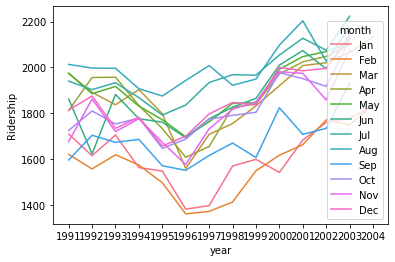

In [ ]:
# Line plot for Ridership based on year  and for each month
sns.lineplot(x="year",y="Ridership",hue="month",data=Amtrak)

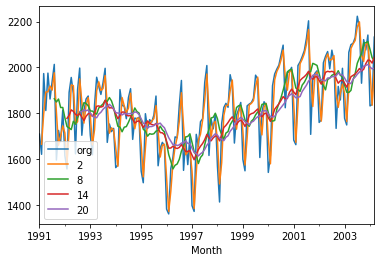

In [ ]:
# moving average for the time series to understand better about the trend character in Amtrak
Amtrak.Ridership.plot(label="org")
for i in range(2,24,6):
    Amtrak["Ridership"].rolling(i).mean().plot(label=str(i))
plt.legend(loc=3)

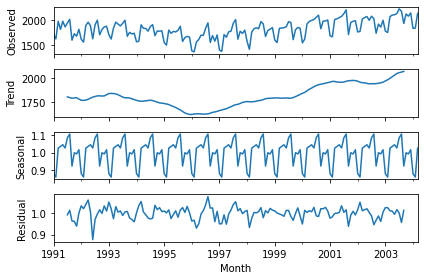

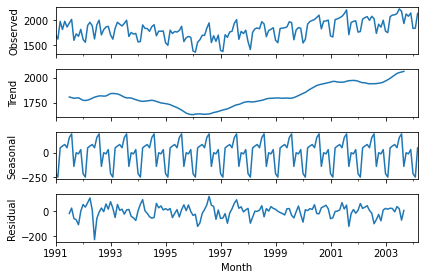

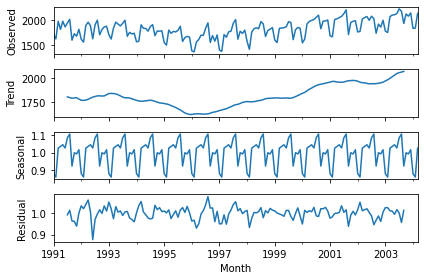

In [ ]:
# Time series decomposition plot 
decompose_ts_add = seasonal_decompose(Amtrak.Ridership,model="additive")
decompose_ts_add.plot()
decompose_ts_mul = seasonal_decompose(Amtrak.Ridership,model="multiplicative")
decompose_ts_mul.plot()

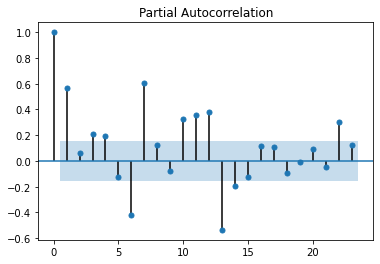

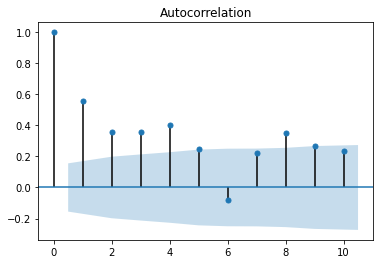

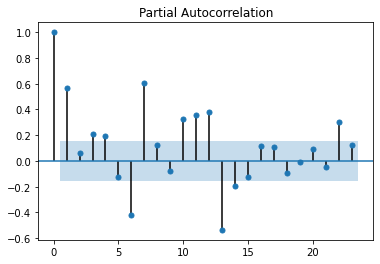

In [ ]:
# ACF plots and PACF plots on Original data sets 
tsa_plots.plot_acf(Amtrak.Ridership,lags=10)
tsa_plots.plot_pacf(Amtrak.Ridership)

In [ ]:
# Amtrak.index.freq = "MS" 
# splitting the data into Train and Test data and considering the last 12 months data as 
# Test data and left over data as train data

In [ ]:
Train = Amtrak.head(133)
Test = Amtrak.tail(12)
# to change the index value in pandas data frame 
# Test.set_index(np.arange(1,13),inplace=True)

In [ ]:
# Creating a function to calculate the MAPE value for test data 
def MAPE(pred,org):
    temp = np.abs((pred-org))*100/org
    return np.mean(temp)

In [ ]:
# Simple Exponential Method
ses_model = SimpleExpSmoothing(Train["Ridership"]).fit()
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Ridership) # 7.846321

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


7.846321519164977

In [ ]:
# Holt method 
hw_model = Holt(Train["Ridership"]).fit()
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Ridership) # 7.261176729658341

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


7.261255583222834

In [ ]:
# Holts winter exponential smoothing with additive seasonality and additive trend
hwe_model_add_add = ExponentialSmoothing(Train["Ridership"],seasonal="add",trend="add",seasonal_periods=12,damped=True).fit()
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Ridership) # 4.500954

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


4.929561611504173

In [ ]:
# Holts winter exponential smoothing with multiplicative seasonality and additive trend
hwe_model_mul_add = ExponentialSmoothing(Train["Ridership"],seasonal="mul",trend="add",seasonal_periods=12).fit()
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Ridership) # 4.109309

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


4.108243194480381

In [ ]:
# Lets us use auto_arima from p
from pyramid.arima import auto_arima
auto_arima_model = auto_arima(Train["Ridership"],start_p=0,
                              start_q=0,max_p=10,max_q=10,
                              m=12,start_P=0,seasonal=True,
                              d=1,D=1,trace=True,error_action="ignore",
                              suppress_warnings= True,
                              stepwise=False)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/pyramid/__init__.py:68: UserWarning: 
    The 'pyramid' package will be migrating to a new namespace beginning in 
    version 1.0.0: 'pmdarima'. This is due to a package name collision 

Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 12); AIC=1369.488, BIC=1377.851, Fit time=0.630 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 2, 12); AIC=1370.881, BIC=1382.031, Fit time=1.951 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 1, 1, 12); AIC=1371.006, BIC=1382.156, Fit time=1.262 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 1, 2, 12); AIC=1372.203, BIC=1386.140, Fit time=4.393 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(2, 1, 1, 12); AIC=1372.069, BIC=1386.006, Fit time=3.647 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(2, 1, 2, 12); AIC=1369.878, BIC=1386.603, Fit time=4.497 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=1350.254, BIC=1361.404, Fit time=0.797 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=1352.051, BIC=1365.989, Fit time=2.048 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=1352.033, BIC=1365.970, Fit time=1.096 seconds
Fit ARIMA: order=(0, 1, 1) s

In [ ]:
auto_arima_model.summary() # SARIMAX(1, 1, 1)x(0, 1, 1, 12)
# AIC ==> 1348.728
# BIC ==> 1362.665

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  133
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -669.364
Date:                            Thu, 14 Jan 2021   AIC                           1348.728
Time:                                    05:40:55   BIC                           1362.665
Sample:                                         0   HQIC                          1354.388
                                            - 133                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.7032      0.549      1.280      0.200      -0.373       1.780
ar.L1          0.3537      0.128      2.765      0.006       0.103       0.604
ma.L1         -0.8053      0.094     -8.598      0.000      -0.989      -0.622
ma.S.L12      -0.7491      0.121     -6.203      0.000      -0.986      -0.512
sigma2      3761.4571    543.540      6.920      0.000    2696.138    4826.776
===================================================================================
Ljung-Box (Q):                       20.07   Jarque-Bera (JB):                 0.53
Prob(Q):                              1.00   Prob(JB):                         0.77
Heteroskedasticity (H):               0.48   Skew:                            -0.14
Prob(H) (two-sided):                  0.02   Kurtosis:                         3.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# For getting Fitted values for train data set we use 
# predict_in_sample() function 
auto_arima_model.predict_in_sample( )

array([1.08810780e+00, 1.70824370e+03, 1.62162359e+03, 1.97316717e+03,
       1.81311004e+03, 1.97574869e+03, 1.86321739e+03, 1.94098069e+03,
       2.01392958e+03, 1.59803006e+03, 1.72642432e+03, 1.67809738e+03,
       2.67006401e+03, 1.53294496e+03, 1.90296078e+03, 1.73443188e+03,
       2.03201772e+03, 1.80420866e+03, 1.79045724e+03, 1.95869812e+03,
       1.55952162e+03, 1.76092385e+03, 1.71547801e+03, 1.92056670e+03,
       1.68861643e+03, 1.62602334e+03, 1.96254466e+03, 1.84930892e+03,
       1.97173696e+03, 1.74282660e+03, 2.00934153e+03, 2.03232859e+03,
       1.66711818e+03, 1.79624793e+03, 1.77950918e+03, 1.82906556e+03,
       1.61437598e+03, 1.52704323e+03, 1.86475397e+03, 1.90397928e+03,
       1.87112129e+03, 1.72796290e+03, 1.89906897e+03, 1.95567775e+03,
       1.59351553e+03, 1.75834031e+03, 1.75026214e+03, 1.81052999e+03,
       1.61783539e+03, 1.53348974e+03, 1.83322430e+03, 1.81682269e+03,
       1.78855609e+03, 1.69094113e+03, 1.86061340e+03, 1.88156699e+03,
      

In [ ]:
# For getting predictions for future we use predict() function 
pred_test = pd.Series(auto_arima_model.predict(n_periods=12))
# Adding the index values of Test Data set to predictions of Auto Arima
pred_test.index = Test.index
MAPE(pred_test,Test.Ridership)  # 8.75353

8.753538177519621

In [ ]:
# Using Sarimax from statsmodels 
# As we do not have automatic function in indetifying the 
# best p,d,q combination 
# iterate over multiple combinations and return the best the combination
# For sarimax we require p,d,q and P,D,Q 
combinations_l = list(product(range(1,7),range(2),range(1,7)))
combinations_u = list(product(range(1,7),range(2),range(1,7)))
m =12

TypeError: ignored

In [ ]:
results_sarima = []
best_aic = float("inf")

In [ ]:
for i in combinations_l:
    for j in combinations_u:
        try:
            model_sarima = sm.tsa.statespace.SARIMAX(Train["Ridership"],
                                                     order = i,seasonal_order = j+(m,)).fit(disp=-1)
        except:
            continue
        aic = model_sarima.aic
        if aic < best_aic:
            best_model = model_sarima
            best_aic = aic
            best_l = i
            best_u = j
        results_sarima.append([i,j,model_sarima.aic])

NameError: ignored

In [ ]:
result_sarima_table = pd.DataFrame(results_sarima)
result_sarima_table.columns = ["paramaters_l","parameters_j","aic"]
result_sarima_table = result_sarima_table.sort_values(by="aic",ascending=True).reset_index(drop=True)

ValueError: ignored

In [ ]:
best_fit_model = sm.tsa.statespace.SARIMAX(Train["Ridership"],
                                                     order = (1,1,1),seasonal_order = (1,1,1,12)).fit(disp=-1)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [ ]:
best_fit_model.summary()
best_fit_model.aic # 1350.449
srma_pred = best_fit_model.predict(start = Test.index[0],end = Test.index[-1])
Amtrak["srma_pred"] = srma_pred

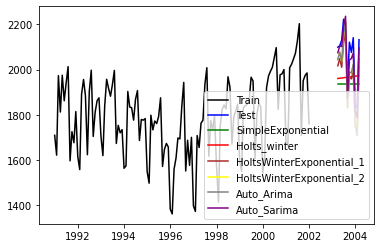

In [ ]:
# Visualization of Forecasted values for Test data set using different methods 
plt.plot(Train.index, Train["Ridership"], label='Train',color="black")
plt.plot(Test.index, Test["Ridership"], label='Test',color="blue")
plt.plot(pred_ses.index, pred_ses, label='SimpleExponential',color="green")
plt.plot(pred_hw.index, pred_hw, label='Holts_winter',color="red")
plt.plot(pred_hwe_add_add.index,pred_hwe_add_add,label="HoltsWinterExponential_1",color="brown")
plt.plot(pred_hwe_mul_add.index,pred_hwe_mul_add,label="HoltsWinterExponential_2",color="yellow")
plt.plot(pred_hwe_mul_add.index,pred_hwe_mul_add,label="Auto_Arima",color="grey")
plt.plot(pred_hwe_mul_add.index,srma_pred,label="Auto_Sarima",color="purple")
plt.legend(loc='best')

In [ ]:
# Models and their MAPE values
model_mapes = pd.DataFrame(columns=["model_name","mape"])
model_mapes["model_name"] = ["]
# Visualizing the ACF and PACF plots for errors

SyntaxError: ignored